In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2023-data-scientists-salary/ds_salaries.csv


In [2]:
data = pd.read_csv('../input/2023-data-scientists-salary/ds_salaries.csv')

# Overview

This notebook was an analysis of the 2023 Data Scientist Salary dataset. After expoloratory analysis, there were 4 questions I was looking to answer:

- Does company size impact salary?
- Does working remotely impact salary?
- Do freelance or contract workers make more than full time employees?
- Can a model be built to predict salary based on experience, company size, remote work ratio, and employment type?


# Results
- Company size does impact salary, medium companies have the highest median salary followed by large companies
- Working remotely can impact salary but not very significantly with high salaries coming from both in-office and fully remote groups
- Full time employees show the highest median salaries but contractors can potentially match or exceed them
- Part-time data scientists generally make the lowest salaries in the group
- The XGB Model using Company Size, Remote Work Ratio, Employment Type and Expierence Level to predict Salary in USD was able to predict within $43,200 of the actual USD Salary
- The most important factor in regards to maximizing salary is Expierence Level


# Exploratory Data Analysis (EDA)

In [3]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
data.keys()

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [7]:
data.isna().sum() 

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

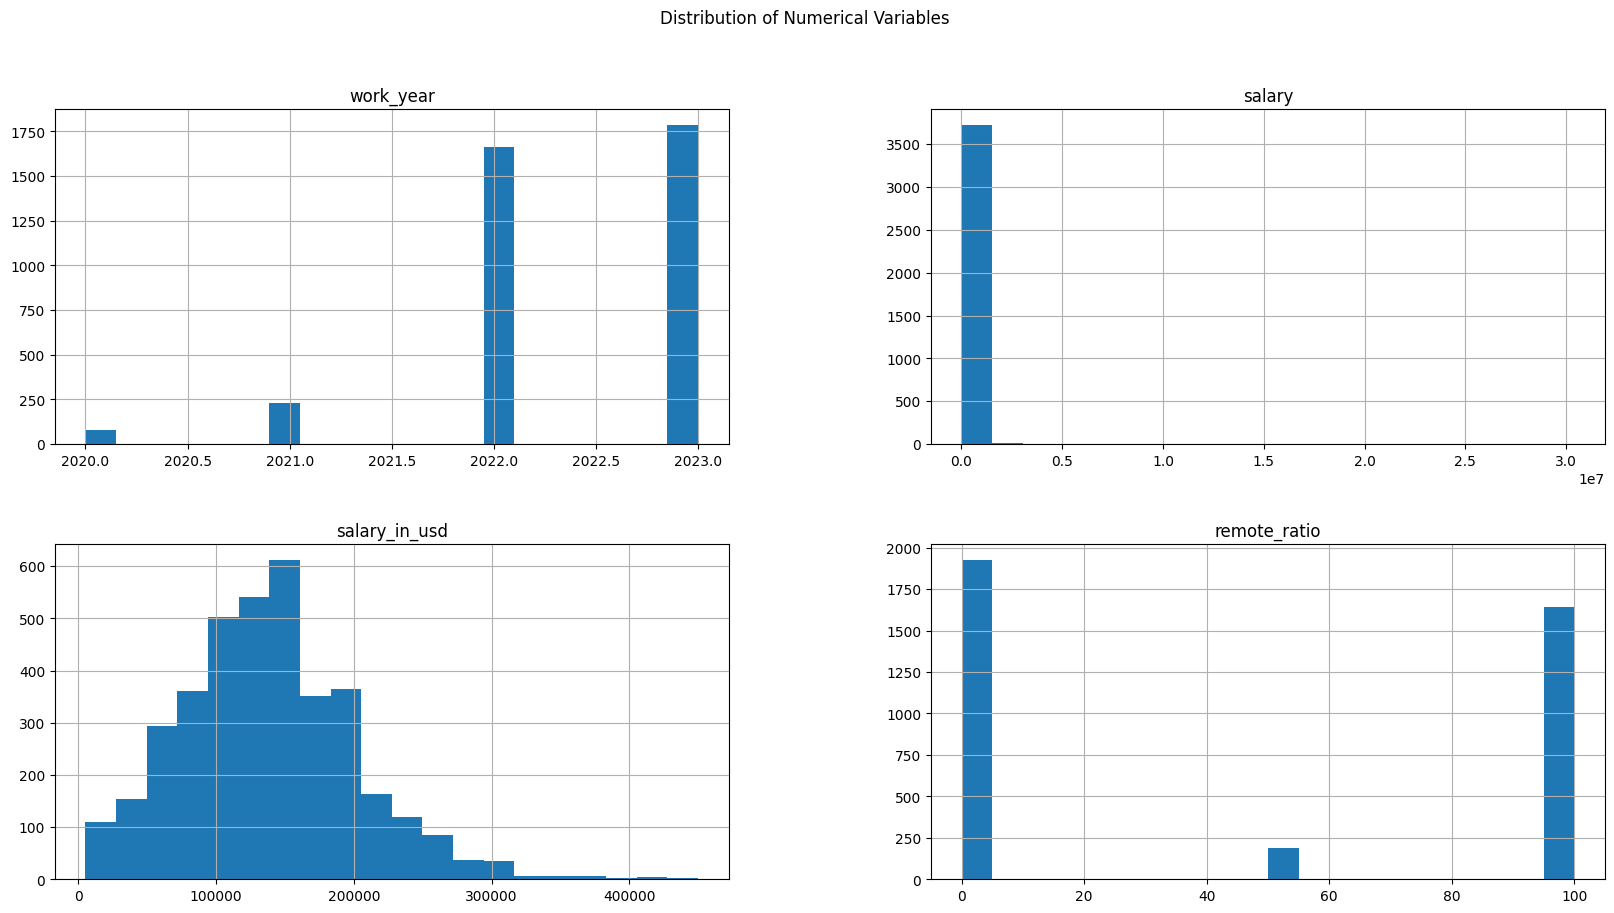

In [8]:
data.hist(bins=20, figsize=(20, 10))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

In [9]:
sns.set_theme(style="white", palette="dark")

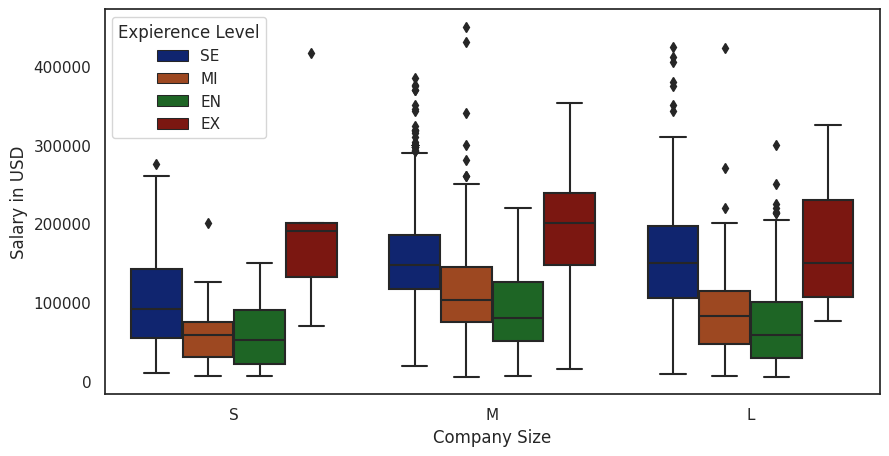

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x="company_size", y="salary_in_usd", hue = 'experience_level', data=data, order=['S', 'M', 'L'])
plt.xlabel("Company Size")
plt.ylabel("Salary in USD")
plt.legend(title="Expierence Level")

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000.]),
 [Text(0.0, 0, '0'),
  Text(25000.0, 0, '25000'),
  Text(50000.0, 0, '50000'),
  Text(75000.0, 0, '75000'),
  Text(100000.0, 0, '100000'),
  Text(125000.0, 0, '125000'),
  Text(150000.0, 0, '150000'),
  Text(175000.0, 0, '175000'),
  Text(200000.0, 0, '200000'),
  Text(225000.0, 0, '225000')])

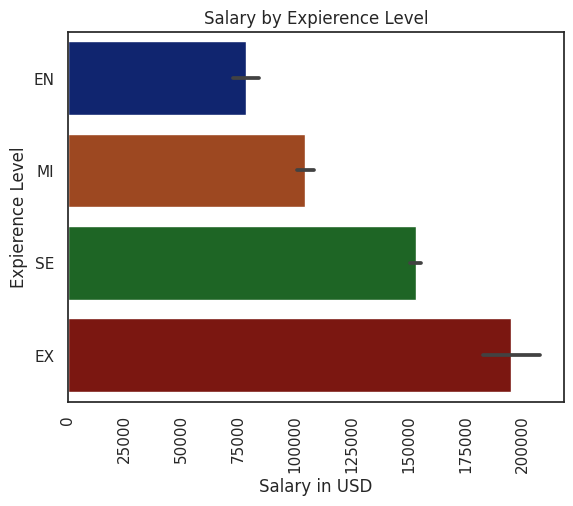

In [11]:
sns.barplot(data = data, x='salary_in_usd', y='experience_level', order=['EN', 'MI', 'SE', 'EX'])
plt.title("Salary by Expierence Level")
plt.xlabel("Salary in USD")
plt.ylabel("Expierence Level")
plt.xticks(rotation=90)

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000.]),
 [Text(0.0, 0, '0'),
  Text(25000.0, 0, '25000'),
  Text(50000.0, 0, '50000'),
  Text(75000.0, 0, '75000'),
  Text(100000.0, 0, '100000'),
  Text(125000.0, 0, '125000'),
  Text(150000.0, 0, '150000'),
  Text(175000.0, 0, '175000'),
  Text(200000.0, 0, '200000'),
  Text(225000.0, 0, '225000')])

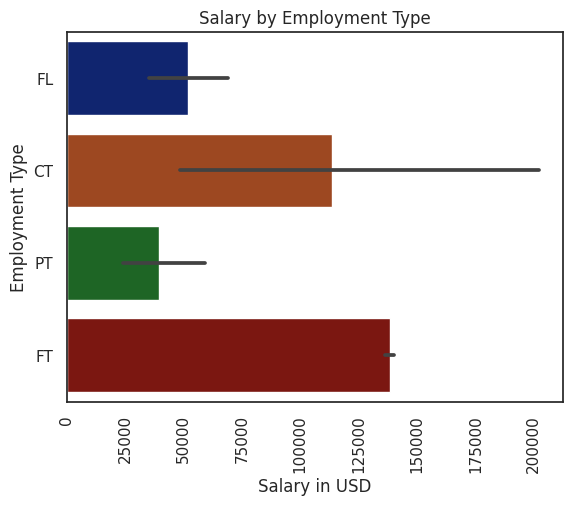

In [12]:
sns.barplot(data = data, x='salary_in_usd', y='employment_type',order=['FL', 'CT', 'PT', 'FT'])
plt.title("Salary by Employment Type")
plt.xlabel("Salary in USD")
plt.ylabel("Employment Type")
plt.xticks(rotation=90)

Text(0, 0.5, 'Company Size')

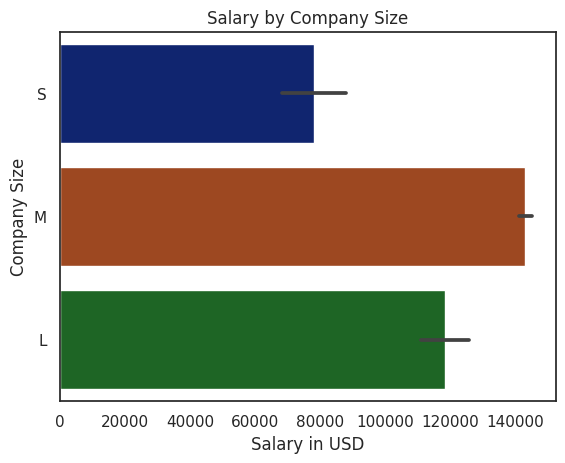

In [13]:
sns.barplot(data = data, x='salary_in_usd', y='company_size', order=['S','M','L'])
plt.title("Salary by Company Size")
plt.xlabel("Salary in USD")
plt.ylabel("Company Size")

In [14]:
x = data
x['exp_lvl']=LE.fit_transform(x.experience_level)
x['emp_type']=LE.fit_transform(x.employment_type)
x['remote ratio']=LE.fit_transform(x.remote_ratio)
x['company size']=LE.fit_transform(x.company_size)

Text(0, 0.5, 'Salary in USD')

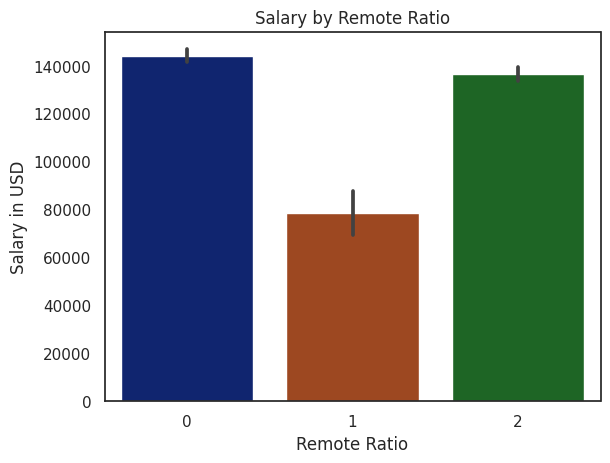

In [15]:
sns.barplot(data = data, x='remote ratio', y='salary_in_usd')
plt.title("Salary by Remote Ratio")
plt.xlabel("Remote Ratio")
plt.ylabel("Salary in USD")


# XGB Model and Feature Importance

In [16]:
features = ['exp_lvl', 'emp_type',
       'remote ratio', 'company size']
X =data[features]
y=data['salary_in_usd']

X_train, X_valid, y_train, y_valid = train_test_split(X,y,random_state=1)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   exp_lvl       3755 non-null   int64
 1   emp_type      3755 non-null   int64
 2   remote ratio  3755 non-null   int64
 3   company size  3755 non-null   int64
dtypes: int64(4)
memory usage: 117.5 KB


In [18]:
from sklearn.ensemble import RandomForestRegressor
model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)



/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [19]:
# Preprocessing of validation data, get predictions
preds = model.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)

print(score)

43140.03409336728


In [20]:
perm = PermutationImportance(model, random_state=1).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.3114 ± 0.0602,exp_lvl
0.0629 ± 0.0164,remote ratio
0.0441 ± 0.0149,company size
-0.0008 ± 0.0074,emp_type
